In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../extracted_data/wine.csv")

# Basic Inspection

In [3]:
from analysis_src.basic_inspection import *

In [4]:
inspector = DataShapeChecker()

In [5]:
inspector.check_shape(df)

(178, 14)

In [6]:
dtype_inspector =DataTypeChecker()

In [7]:
dtype_inspector.check_dtype(df)

Data Types: 
Class                             int64
Alcohol                         float64
Malic                           float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [8]:
stats_checker = StatisticsSummary()

In [9]:
stats_checker.stats(df)

Numerical Statistics: 
            Class     Alcohol       Malic         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.0

In [10]:
inspector = Inspection()

In [11]:
inspector.inspect(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic                         178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

'Data Information: \nNone'

# Insights

## General
The dataset contains 178 rows and 14 columns. There are <b>3 columns</b> of dtype ``` int64```, and <b>11 columns</b> of dtype ``` float64```.
There are no object type features in the dataset, making it more easy to proceed. The overall draft from that dataset is that:

- This is a multi-class task, with the target ``` class``` going from 1-3
- There are no missing values

## Statistical Inferences
Of all columns, the ```magnesium``` and the ```proline```  columns seems to have quite the spread. Ranging from 70 to 162. While there seems to be no outlier in the data by merely looking at the distribution, or how our tree-based or complex algorithms treat outliers inline, we still have to handle outliers.

NB: Do some bivariate analysis to see how these may affect our predictions.

# Missing Values

In [12]:
from analysis_src.missing_values import MissingDataVisualizer

In [13]:
viz = MissingDataVisualizer(df)

In [14]:
df_missing = viz.check_missing_values()

No missing values present in the dataframe.


In [15]:
viz.summary()

No missing values found in the dataframe.


# Bivariate Analysis

In [16]:
from analysis_src.bivariate_analysis import NumericalVSNumericalAnalysis, CategoricalVSNumericalAnalysis

In [17]:
df.head()

Class  Alcohol  Malic   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      1    14.23   1.71  2.43               15.6        127           2.80   
1      1    13.20   1.78  2.14               11.2        100           2.65   
2      1    13.16   2.36  2.67               18.6        101           2.80   
3      1    14.37   1.95  2.50               16.8        113           3.85   
4      1    13.24   2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

In [18]:
analyzer = NumericalVSNumericalAnalysis(df)

### Plotting Alcohol against Alcalinity of ash

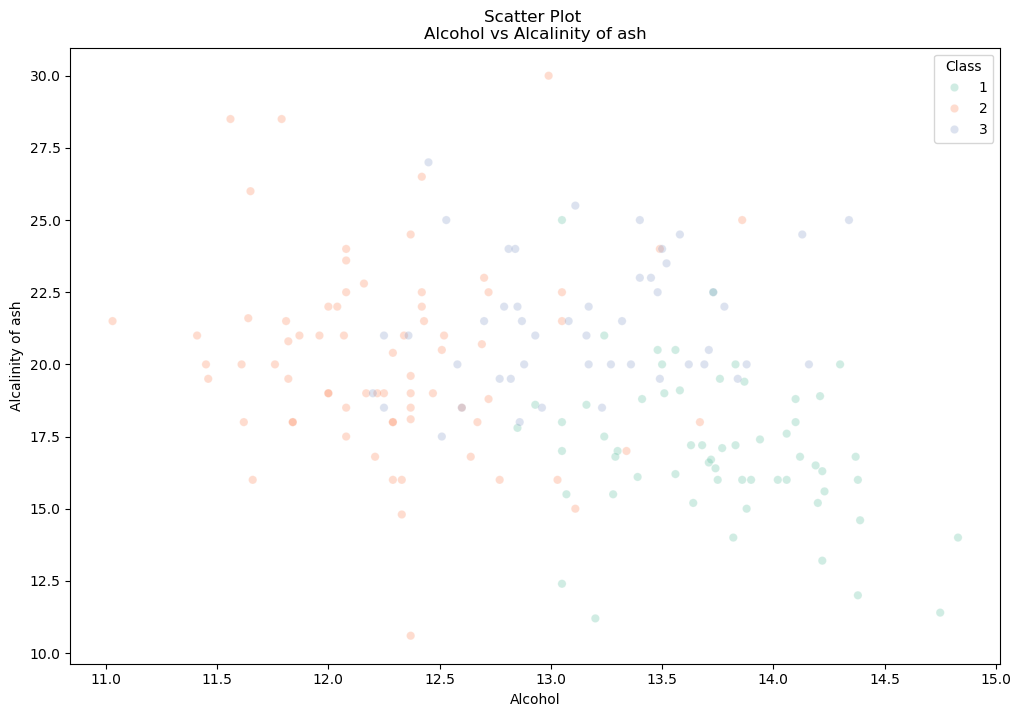

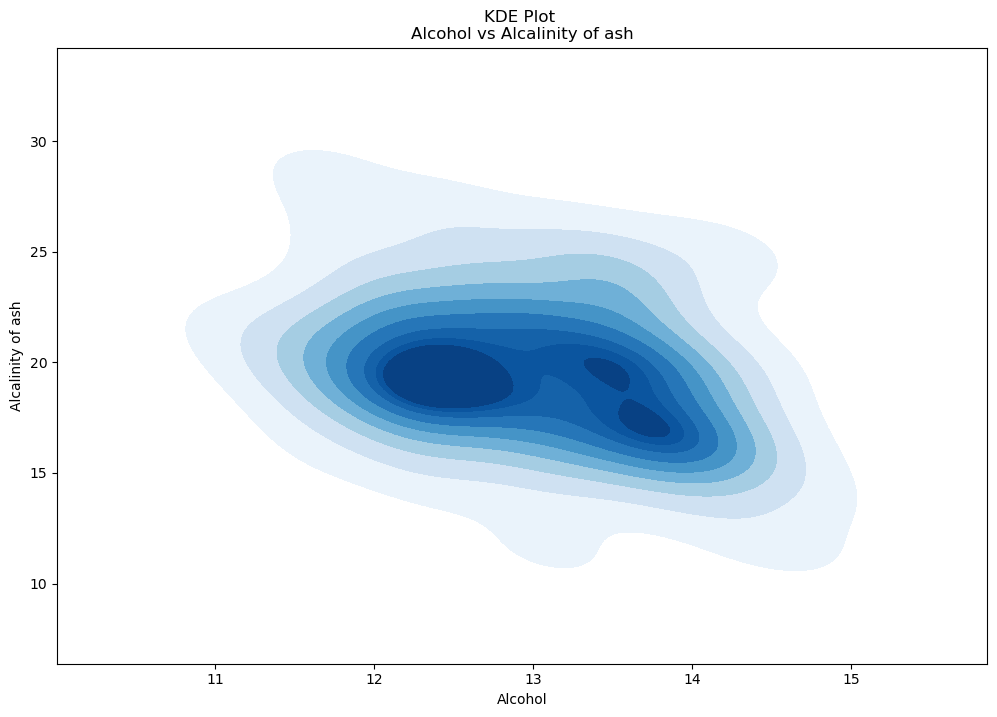

In [19]:
analyzer.plot("Alcohol", "Alcalinity of ash", "Class")

## Insight
The scatter plot showed that there exists linear relationship between the two features.

While visual is not statistical, there are points that are detached from the main density cloud. A further analysis will be done to automatically catch and handle outliers, either by winsorization or dropping.

### Plotting Alcohol against Magnesium

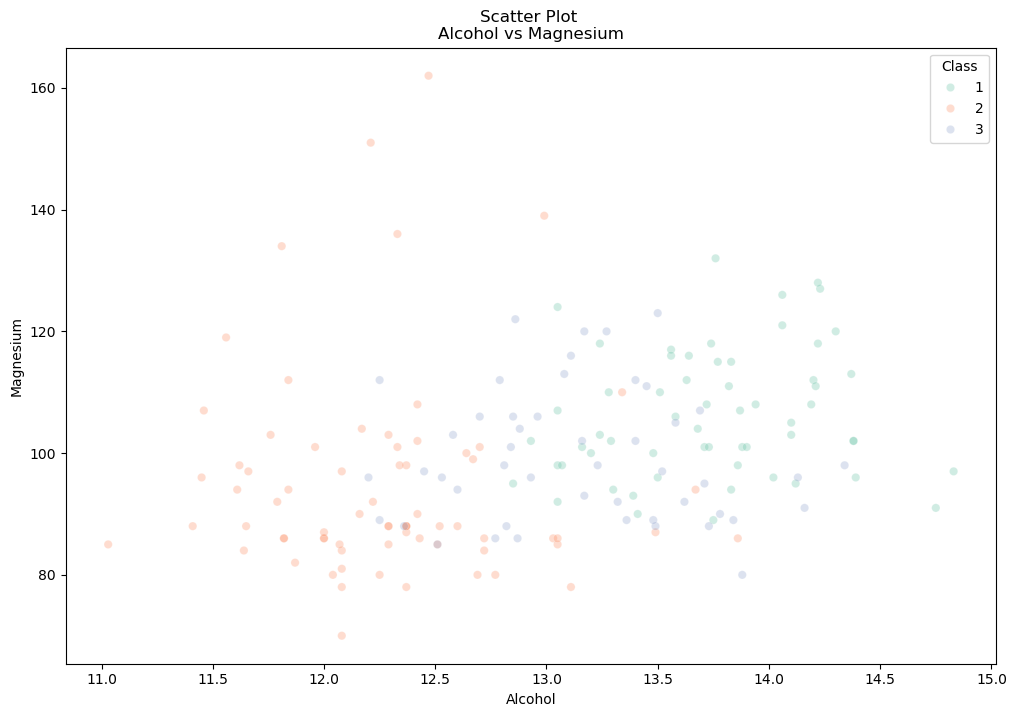

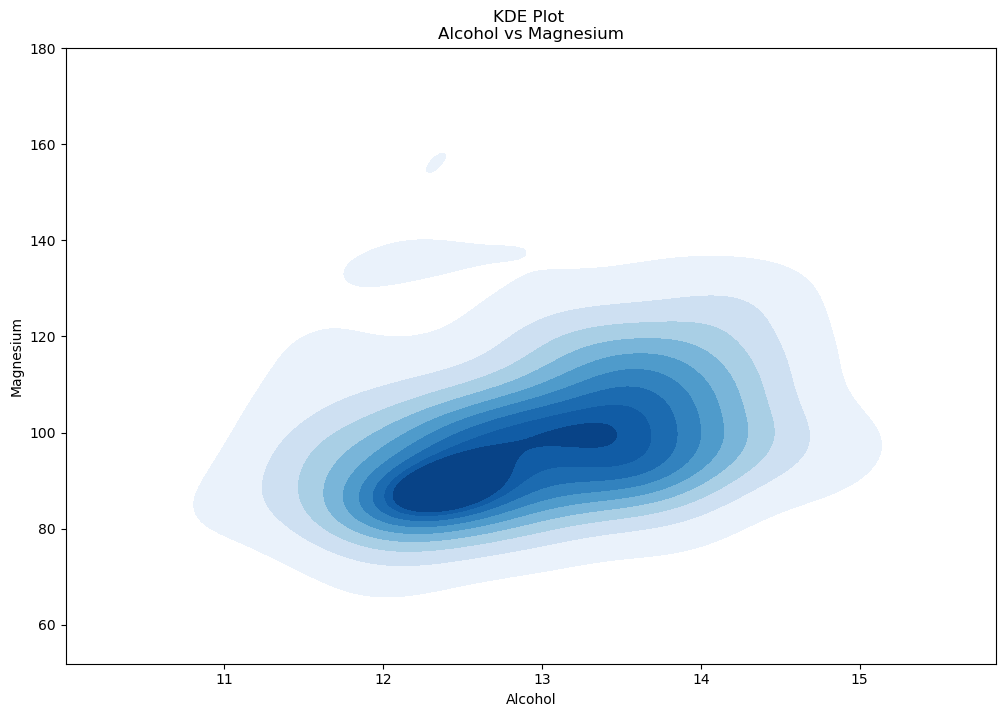

In [20]:
analyzer.plot("Alcohol", "Magnesium", "Class")

### Plotting Magnesium against Proline

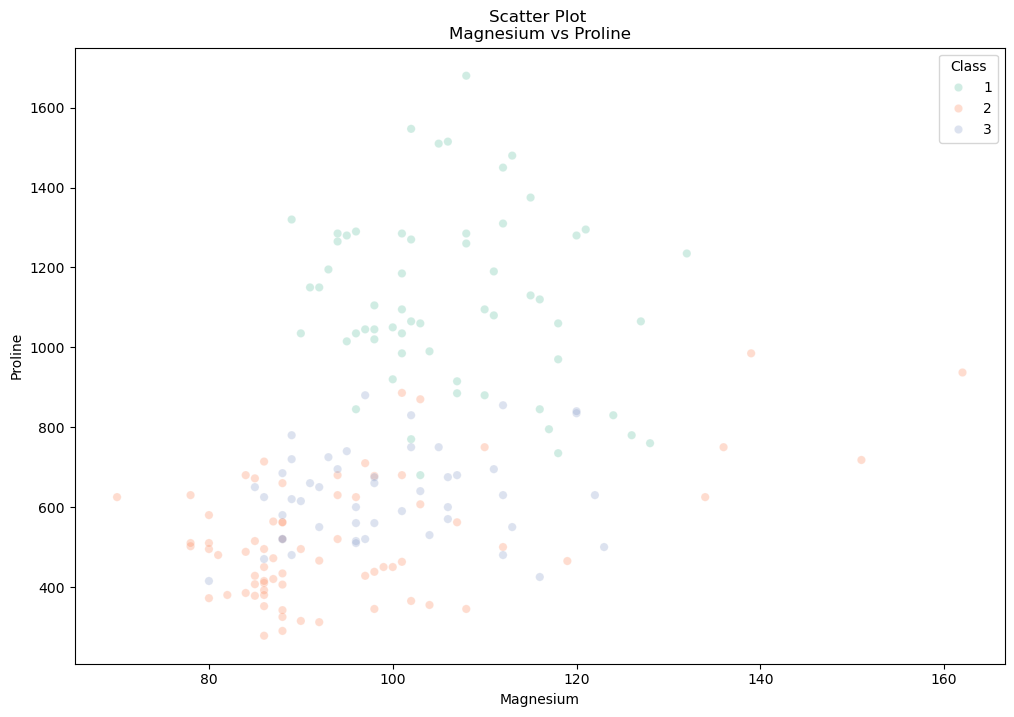

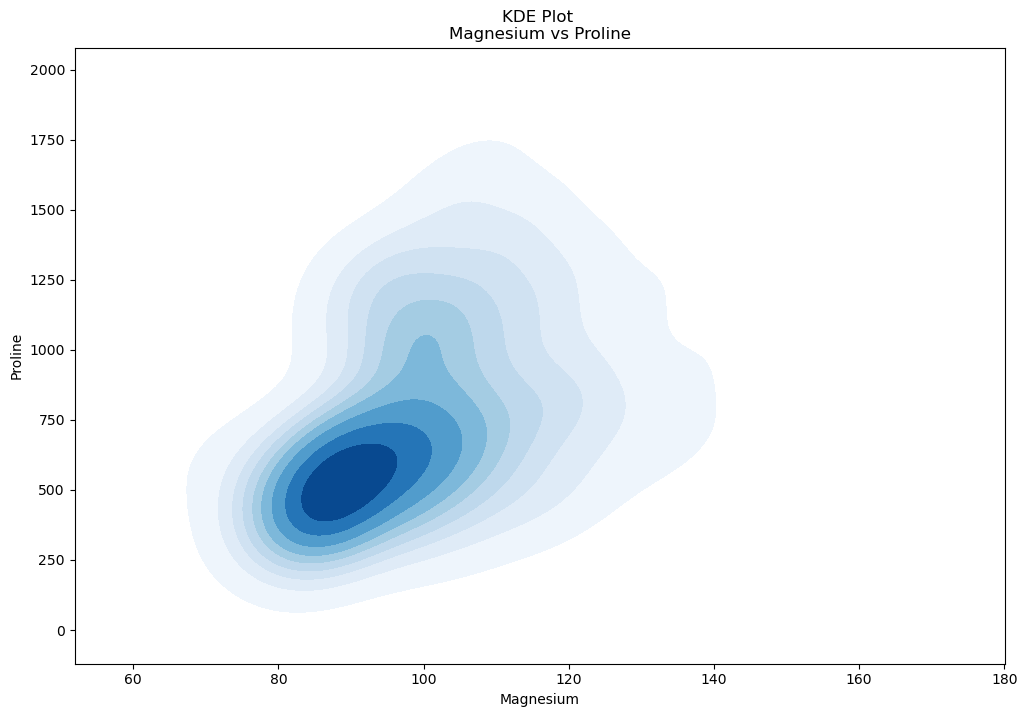

In [21]:
analyzer.plot("Magnesium", "Proline", "Class")

No clear linear relationship is observed between Magnesium and Proline. To quantitatively assess this, we will use a Pair Plot with regression lines in our multivariate analysis.

### Checking ```Alcohol``` distribution over ```Class```

In [22]:
analyzer = CategoricalVSNumericalAnalysis(df)

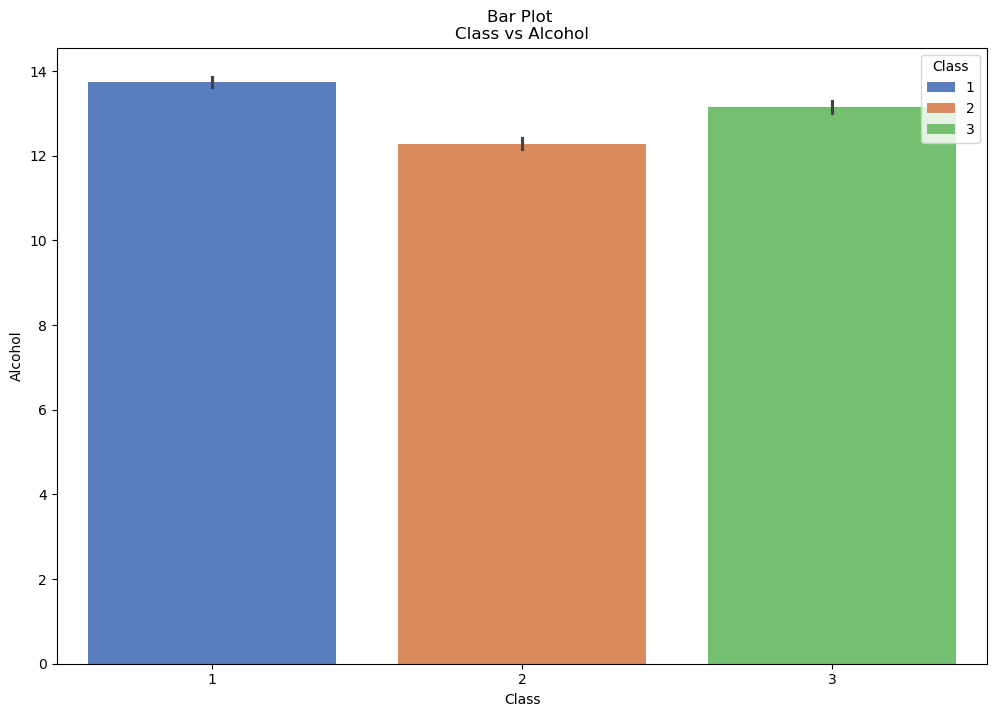

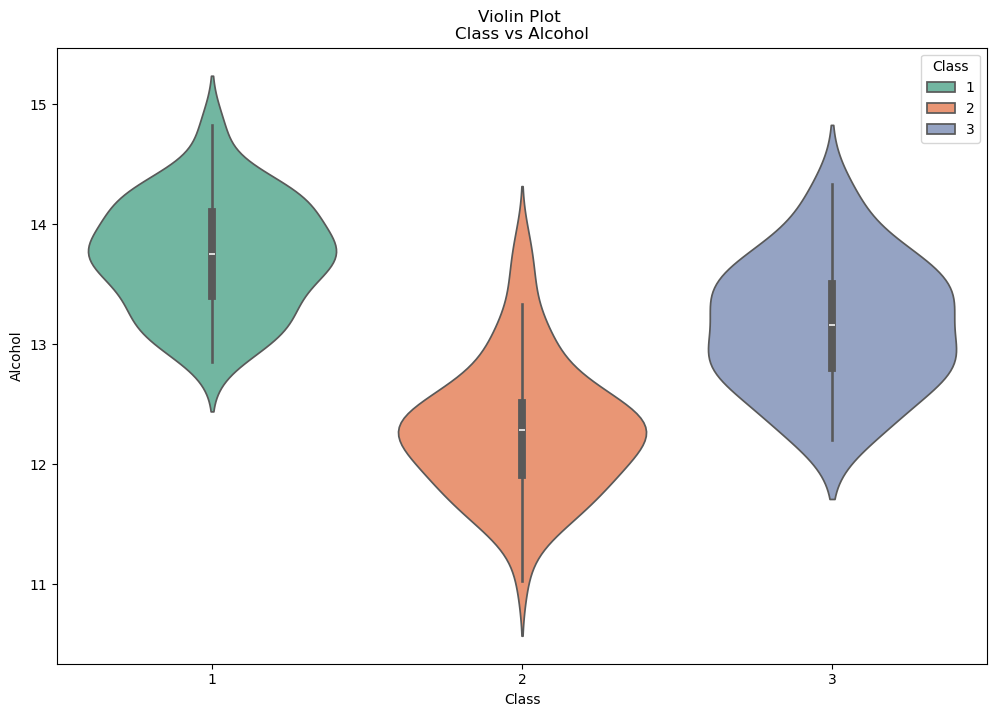

In [23]:
analyzer.plot("Class", "Alcohol", "Class")

# Multivariate Analysis

In [24]:
from analysis_src.multivariate_analysis import PairPlot, ParallelPlot, AndrewsCurve, HeatMap, RadViz

### PairPlot

In [25]:
viz = PairPlot()

<Figure size 1200x800 with 0 Axes>

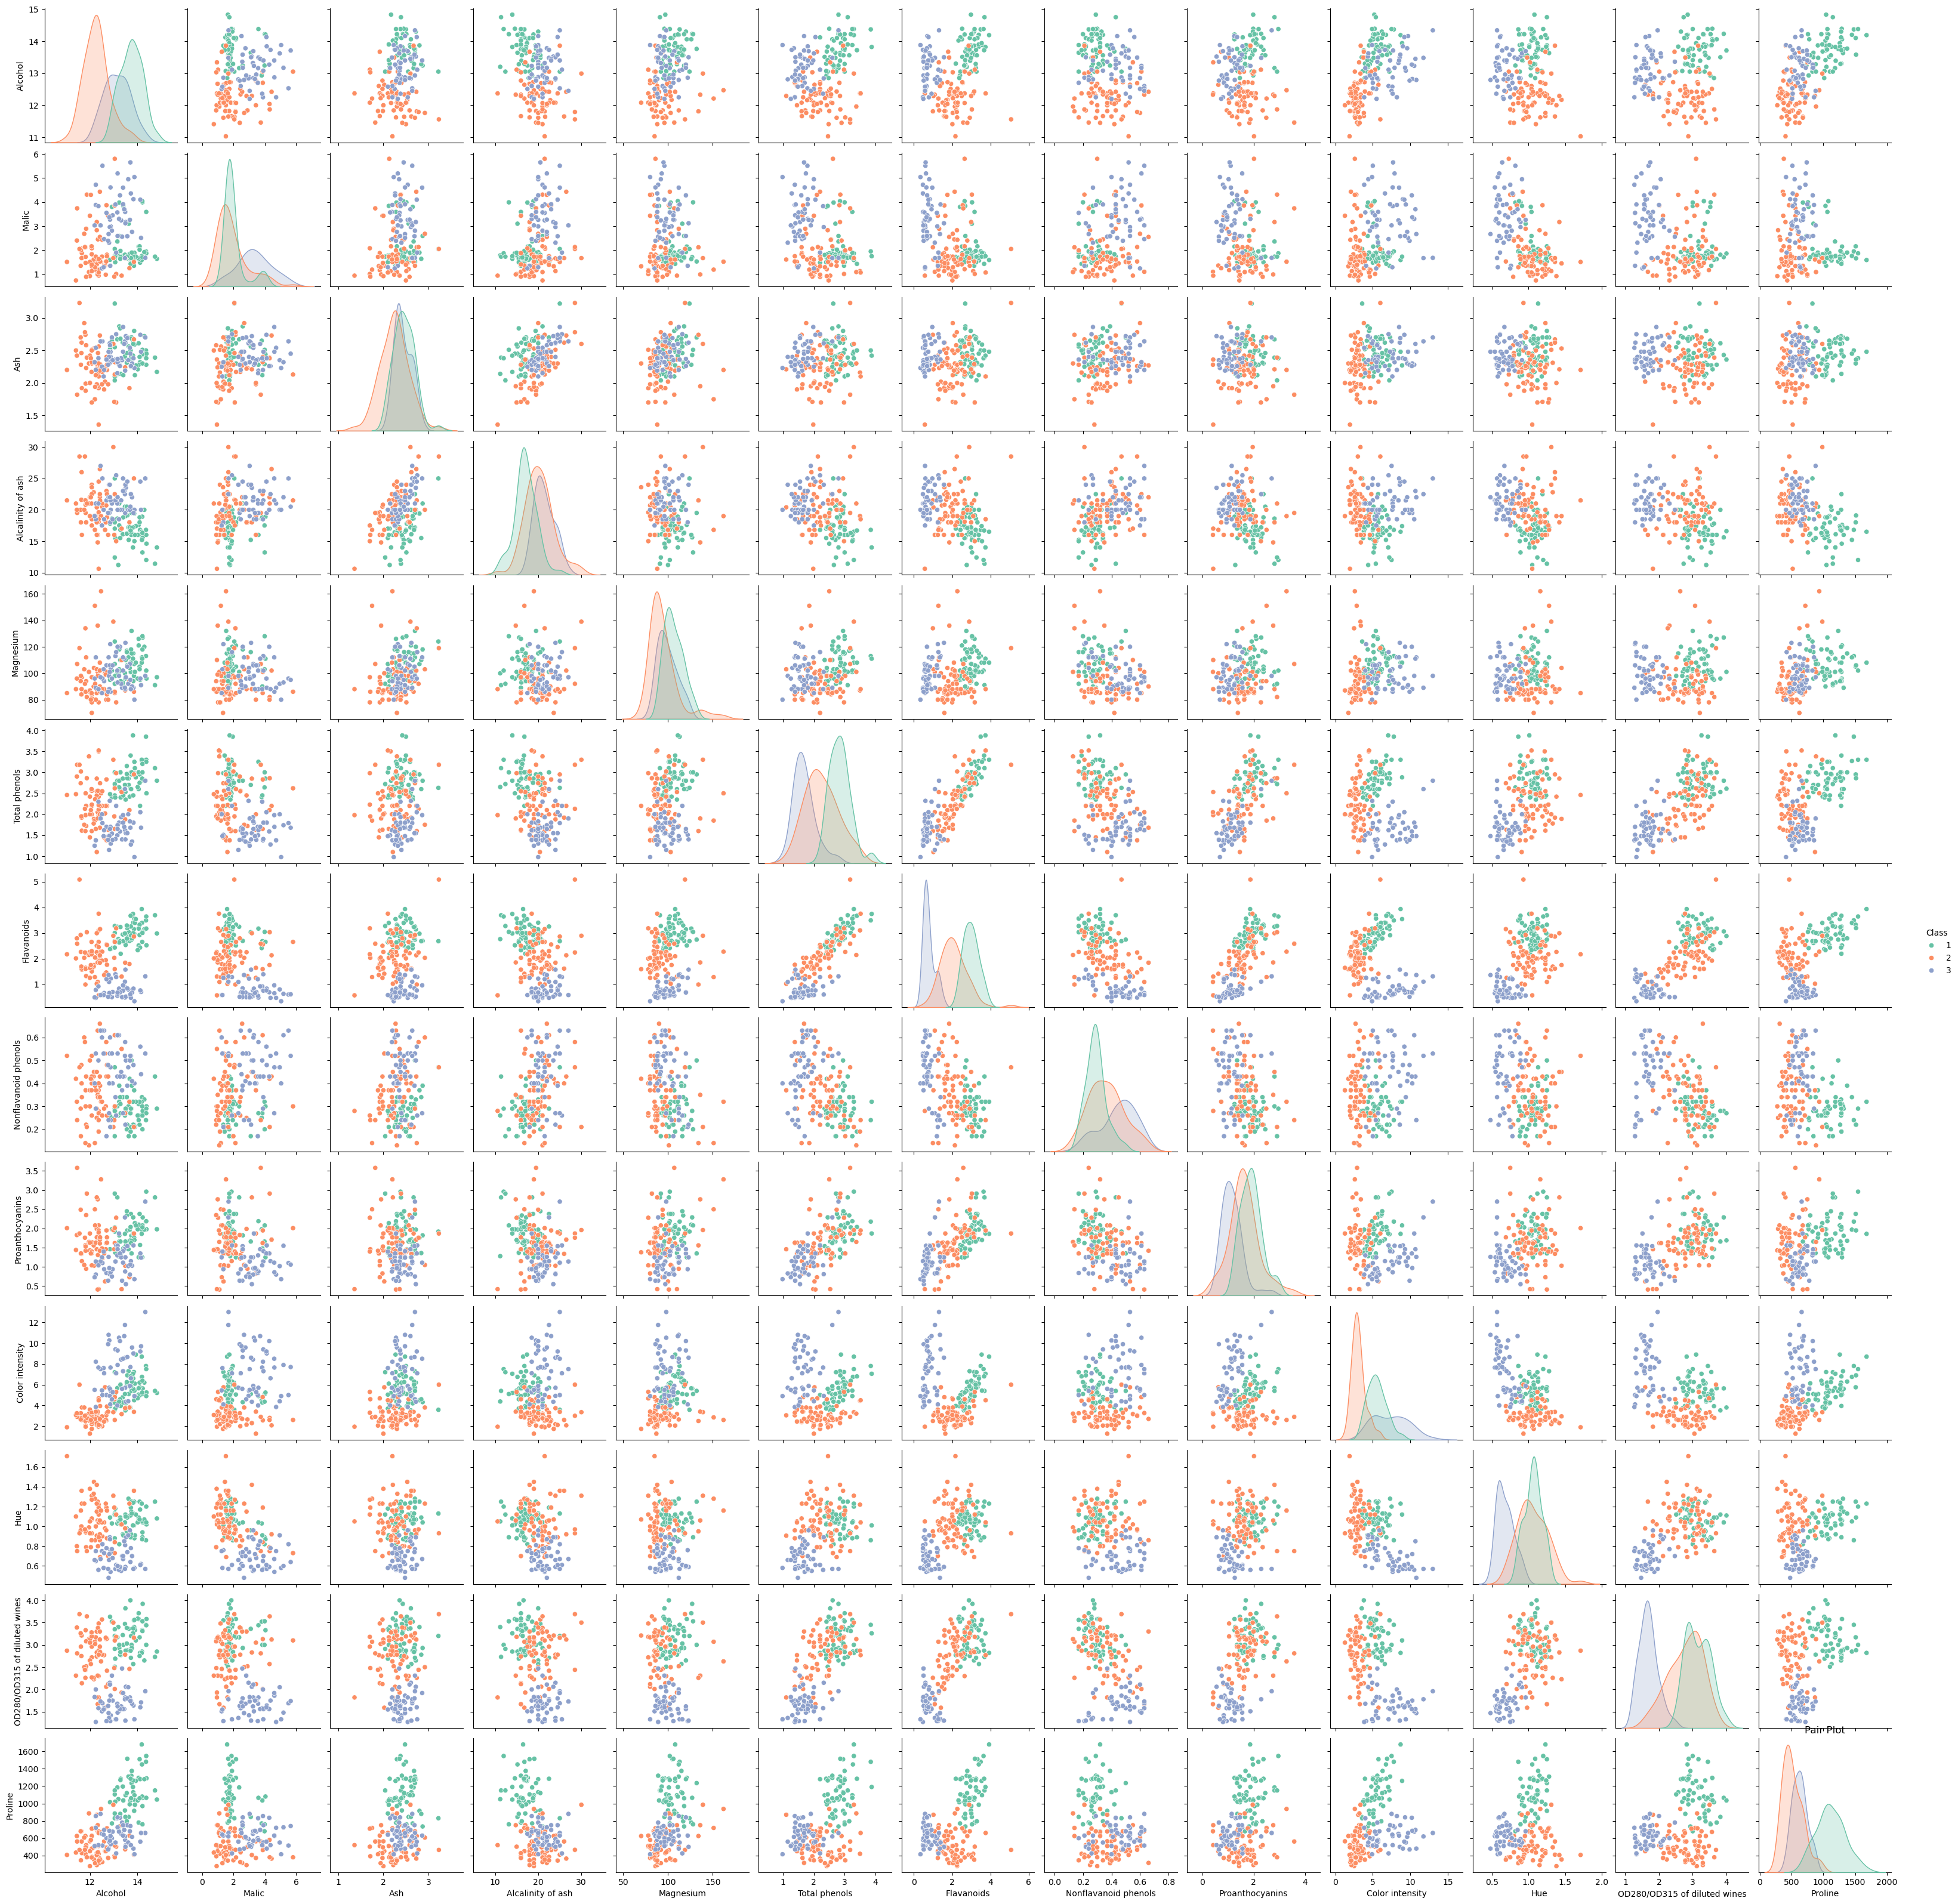

In [26]:
viz.plot(df, target="Class")

### HeatMap

In [27]:
viz = HeatMap()

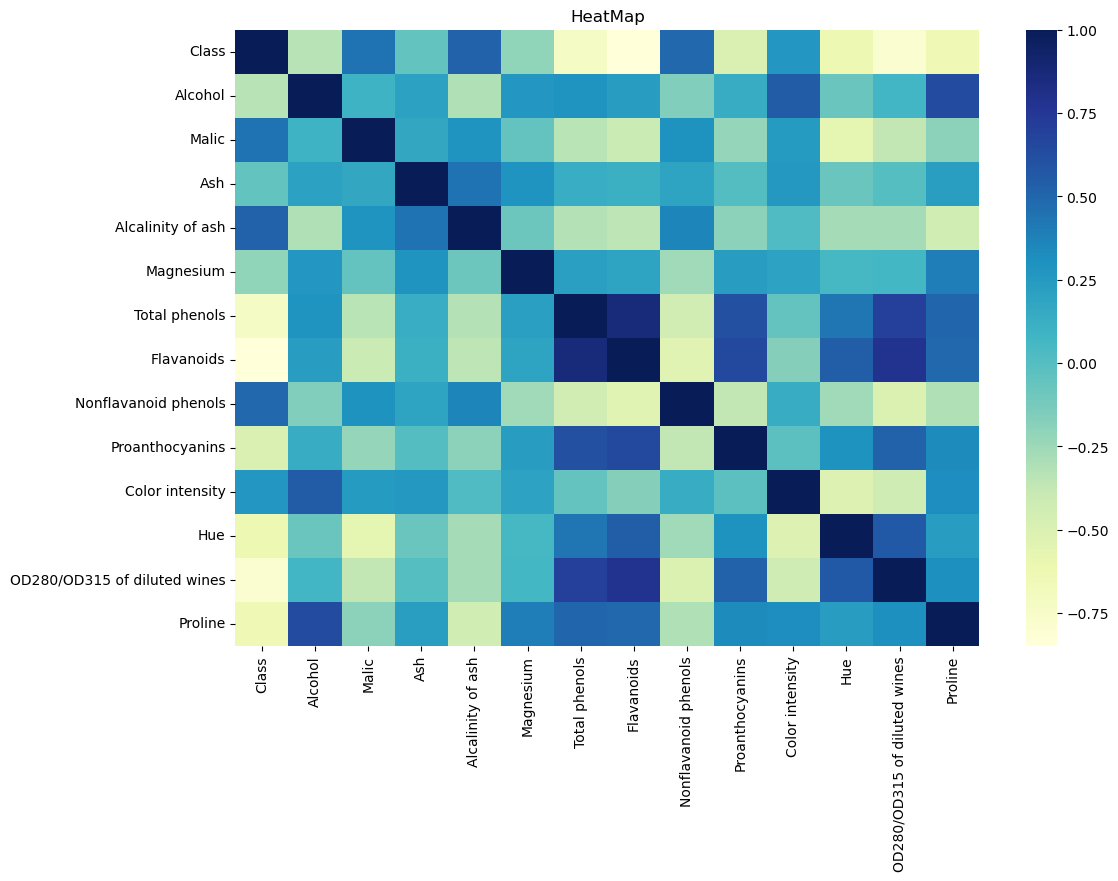

In [28]:
viz.plot(df, target="Class")

### Andrews Curve

In [29]:
viz = AndrewsCurve()

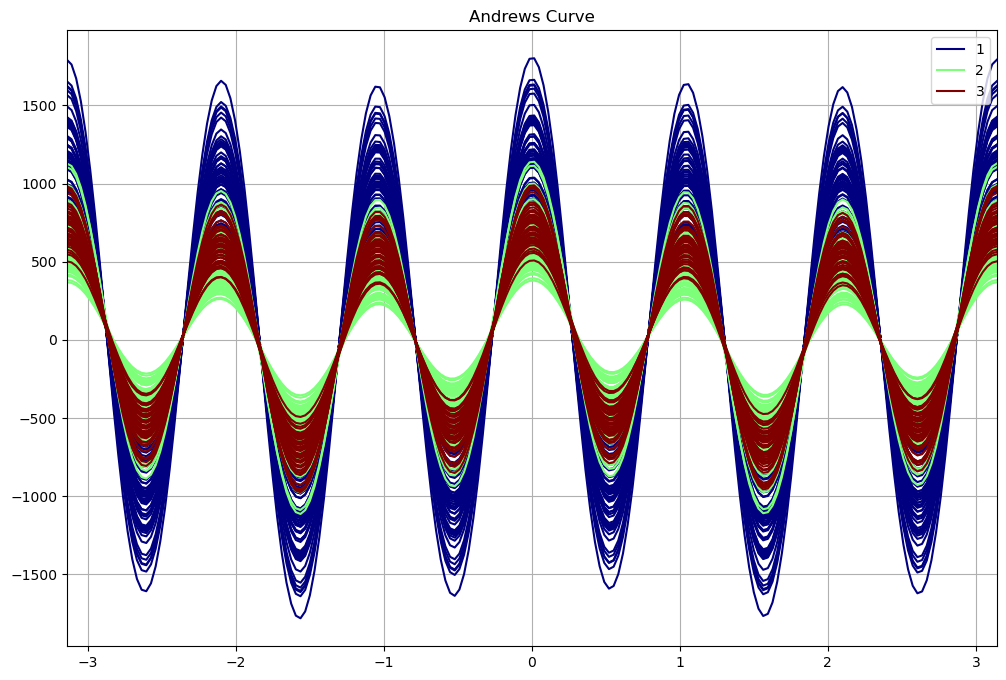

In [30]:
viz.plot(df, target="Class")

### RadViz

In [31]:
viz = RadViz()

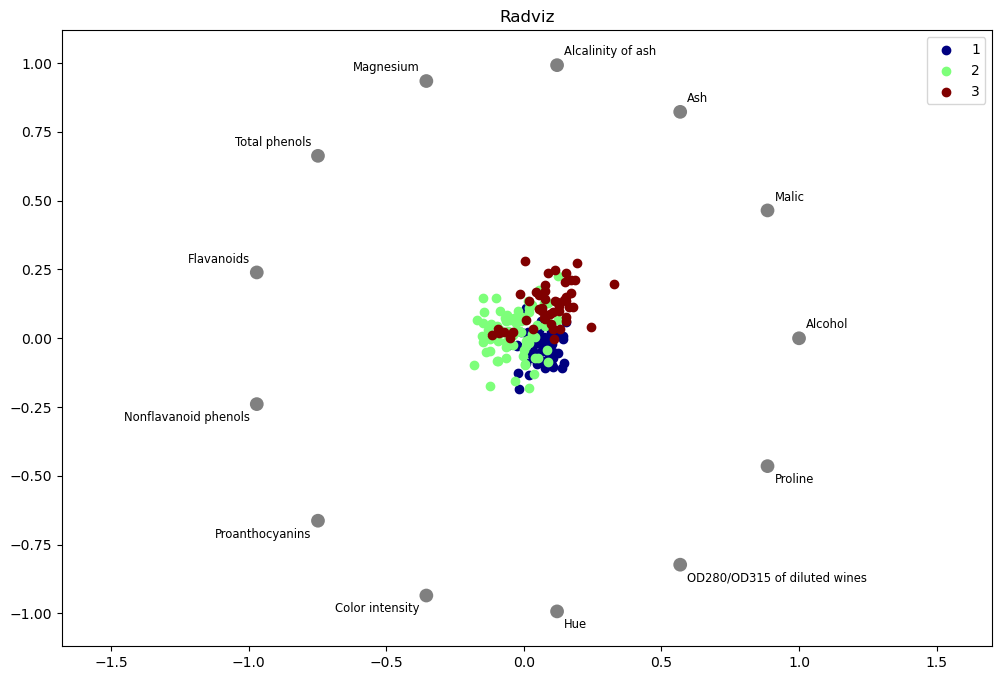

In [32]:
viz.plot(df, target="Class")

### Parallel Coordinates

In [33]:
viz = ParallelPlot()

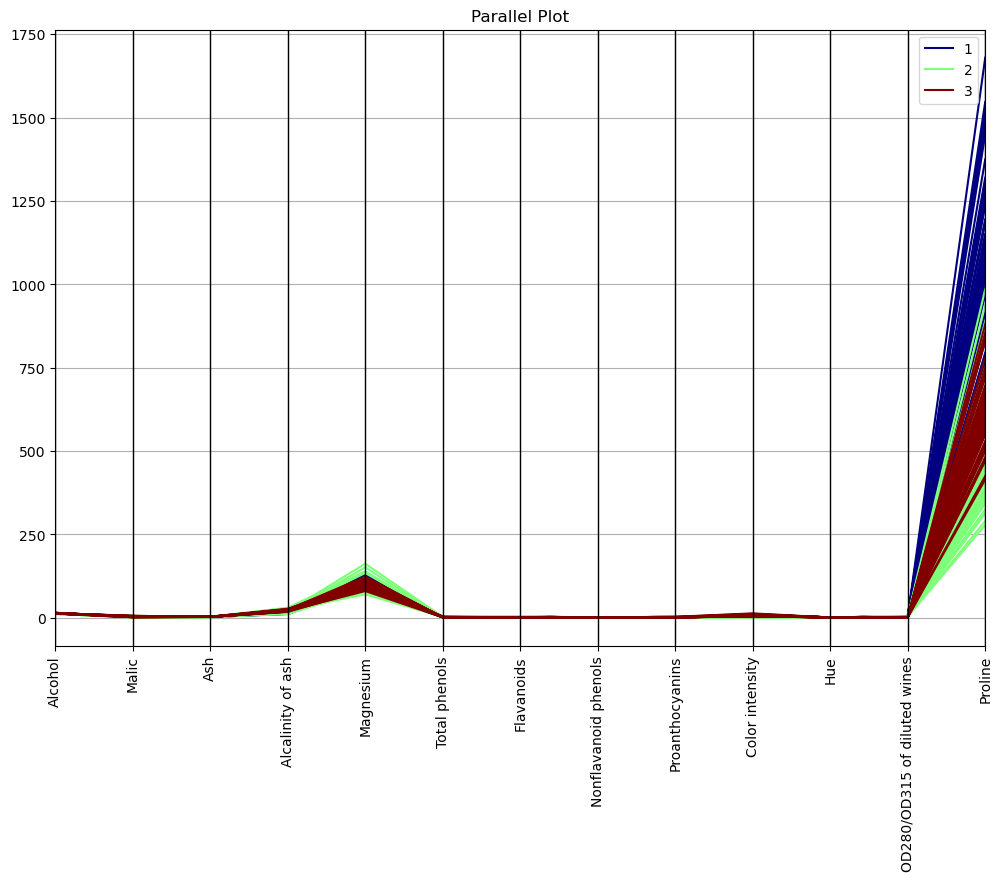

In [34]:
viz.plot(df, target="Class")

# Univariate Analysis

In [35]:
from analysis_src.univariate_analysis import NumericalUnivariateAnalyzer, CategoricalUnivariateAnalyzer

In [36]:
viz = NumericalUnivariateAnalyzer(df)

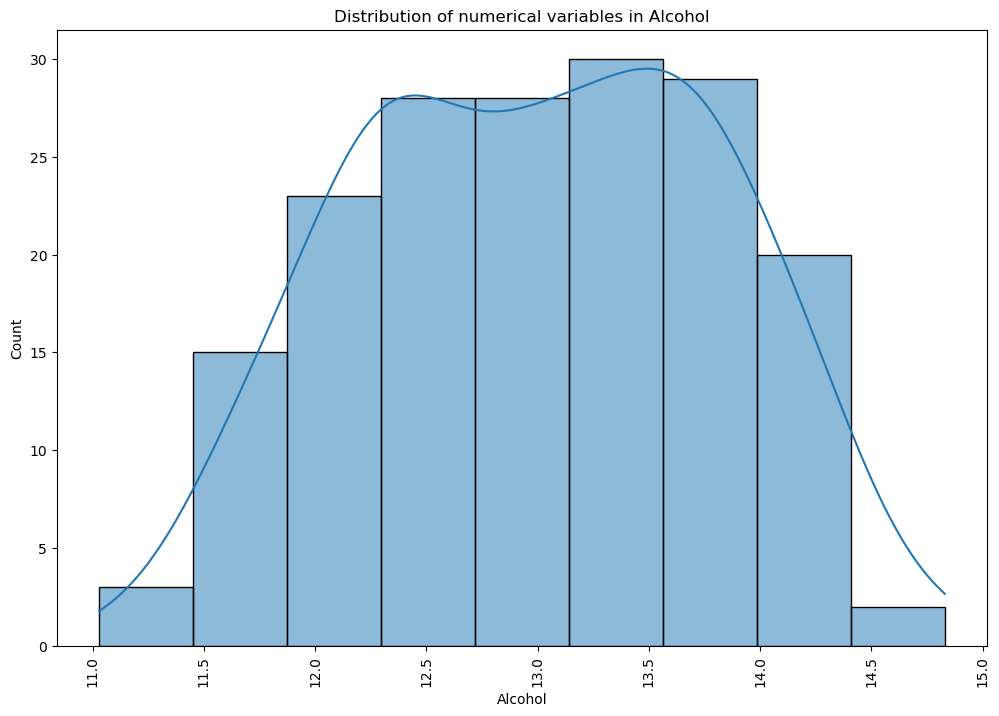

In [37]:
viz.plot_distribution("Alcohol")

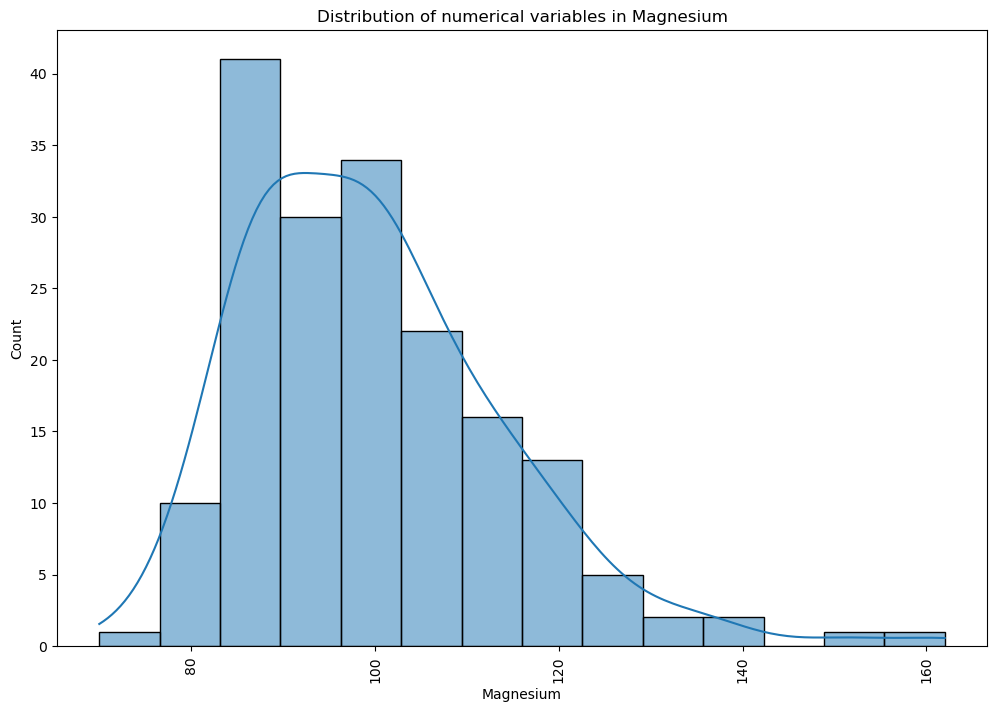

In [38]:
viz.plot_distribution("Magnesium")

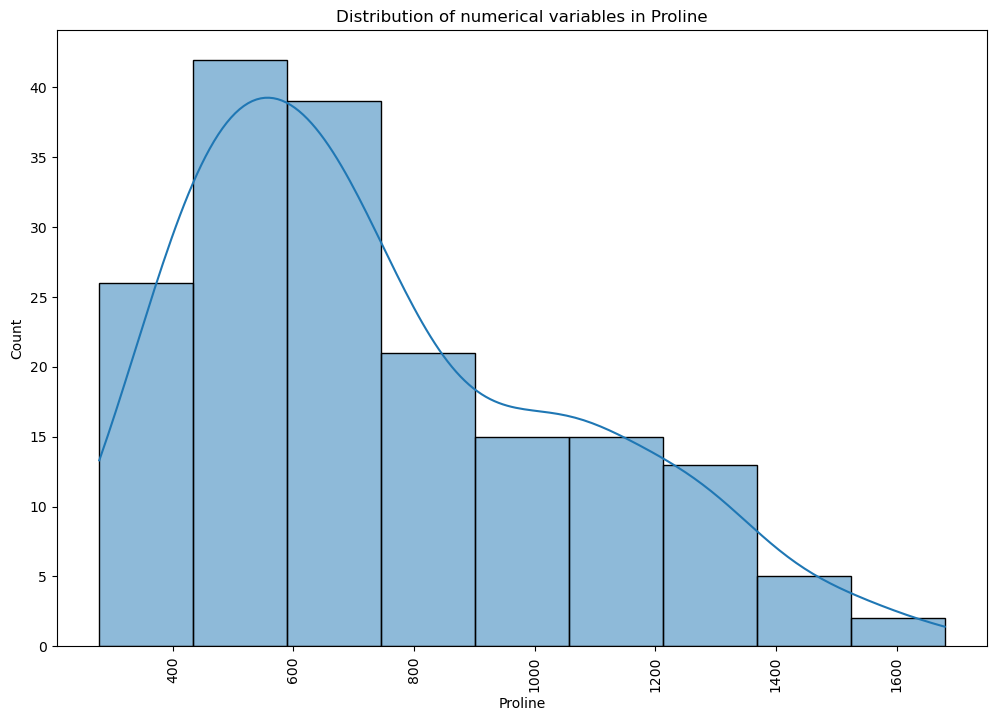

In [39]:
viz.plot_distribution("Proline")

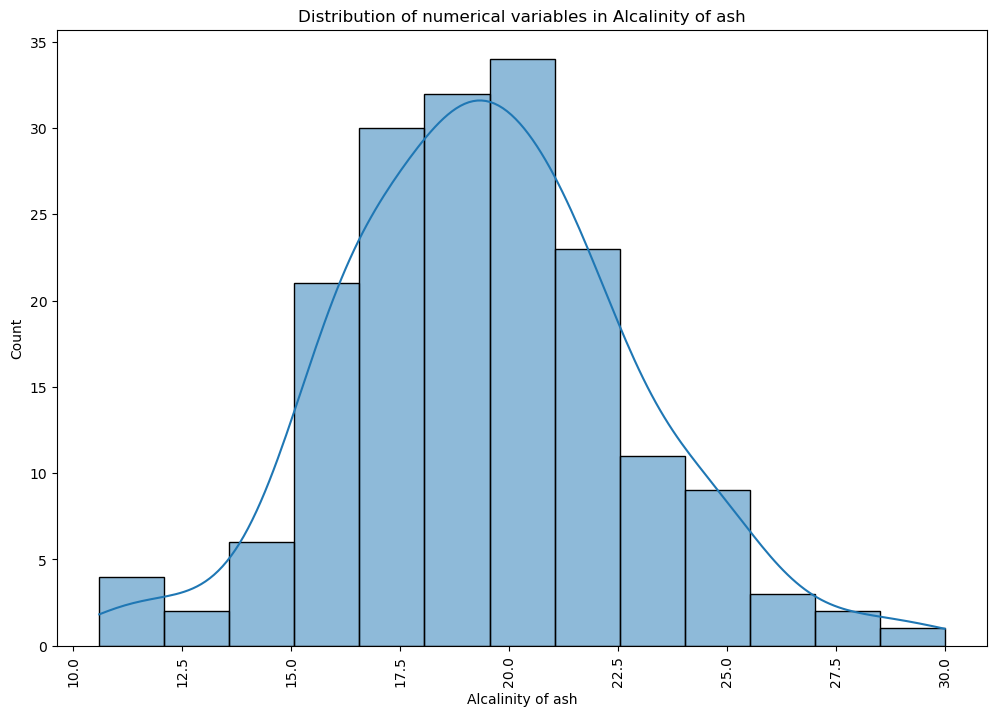

In [40]:
viz.plot_distribution("Alcalinity of ash")

In [41]:
viz = CategoricalUnivariateAnalyzer(df)

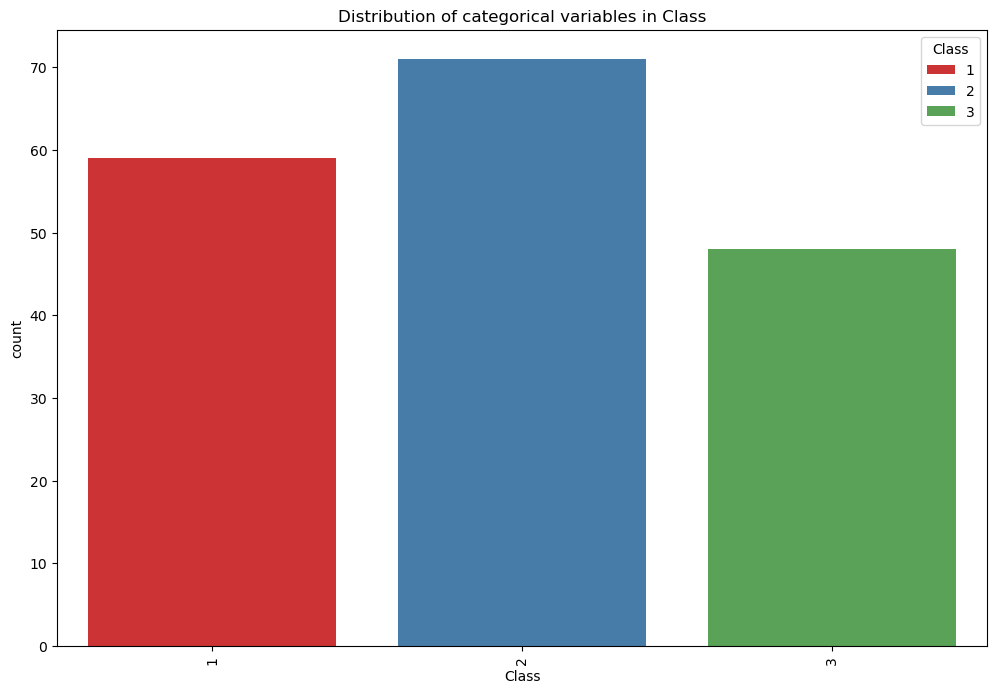

In [43]:
viz.plot_distribution("Class")